# Import Dataset

In [6]:
!pip install kaggle

  Using cached kaggle-1.6.17-py3-none-any.whl
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)


In [7]:
data_directory = '../data'

In [8]:
!kaggle datasets download -d mexwell/steamgames -p {data_directory}

Dataset URL: https://www.kaggle.com/datasets/mexwell/steamgames
License(s): other




  0%|          | 0.00/70.8M [00:00<?, ?B/s]
  1%|▏         | 1.00M/70.8M [00:00<00:46, 1.59MB/s]
  3%|▎         | 2.00M/70.8M [00:00<00:24, 2.90MB/s]
  4%|▍         | 3.00M/70.8M [00:00<00:18, 3.79MB/s]
  6%|▌         | 4.00M/70.8M [00:01<00:15, 4.59MB/s]
  7%|▋         | 5.00M/70.8M [00:01<00:13, 5.07MB/s]
  8%|▊         | 6.00M/70.8M [00:01<00:12, 5.53MB/s]
 10%|▉         | 7.00M/70.8M [00:01<00:11, 5.80MB/s]
 11%|█▏        | 8.00M/70.8M [00:01<00:10, 6.15MB/s]
 13%|█▎        | 9.00M/70.8M [00:01<00:10, 6.31MB/s]
 14%|█▍        | 10.0M/70.8M [00:02<00:09, 6.43MB/s]
 16%|█▌        | 11.0M/70.8M [00:02<00:09, 6.49MB/s]
 17%|█▋        | 12.0M/70.8M [00:02<00:09, 6.53MB/s]
 18%|█▊        | 13.0M/70.8M [00:02<00:09, 6.62MB/s]
 20%|█▉        | 14.0M/70.8M [00:02<00:08, 6.62MB/s]
 21%|██        | 15.0M/70.8M [00:02<00:08, 6.62MB/s]
 23%|██▎       | 16.0M/70.8M [00:03<00:08, 6.64MB/s]
 24%|██▍       | 17.0M/70.8M [00:03<00:08, 6.47MB/s]
 25%|██▌       | 18.0M/70.8M [00:03<00:08, 6.60MB/s]
 

# Unzip Dataset

In [1]:
from dotenv import load_dotenv
import zipfile
import os

load_dotenv("../.env")

zip_file_path = os.path.join(os.getenv('DATA_DIRECTORY'), "steamgames.zip")
extract_to_directory = os.getenv('DATA_DIRECTORY')

os.makedirs(extract_to_directory, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

# Import Libraries

In [2]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
from termcolor import colored
from statsmodels.graphics.tsaplots import plot_acf

# Color pallet and theme
import matplotlib.colors

import warnings
warnings.filterwarnings('ignore')

# Configutation

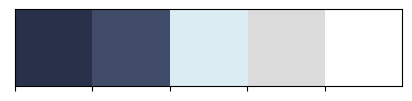

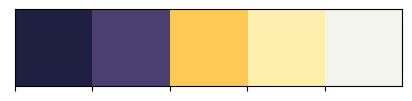

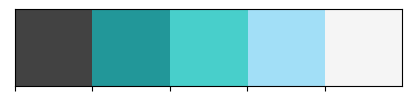

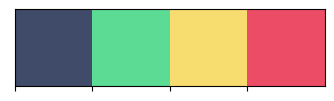

In [3]:
# Colors 1
colors = ["#283149", "#404B69", "#DBEDF3", "#DBDBDB", "#FFFFFF"]
colorsInv = ["#FFFFFF", "#DBDBDB", "#DBEDF3", "#404B69", "#283149"]
palette1 = sns.color_palette(colors)

# Colors 2
colors2 = ["#1F2041", "#4B3F72", "#FFC857", "#FFEFAF", "#F3F4ED"]
colorsInv2 = ["#F3F4ED", "#FFEFAF", "#FFC857", "#4B3F72", "#1F2041"]
palette2 = sns.color_palette(colors2)

# Colors 3
colors3 = ["#424242", "#229799", "#48CFCB", "#A2DFF7", "#F5F5F5"]  
colorsInv3 = ["#F5F5F5", "#A2DFF7", "#48CFCB", "#229799", "#424242"]
palette3 = sns.color_palette(colors3)

# Colors 4
colors4 = ['#404B69', '#5CDB95', '#F7DC6F', '#ED4C67']
colorsInv4 = ['#ED4C67', '#F7DC6F', '#5CDB95', '#404B69']
palette4 = sns.color_palette(colors4)

cmap = matplotlib.colors.ListedColormap(colorsInv)
cmap2 = matplotlib.colors.ListedColormap(colorsInv2)
cmap3 = matplotlib.colors.ListedColormap(colorsInv3)

sns.palplot(sns.color_palette(colors))

sns.palplot(sns.color_palette(colors2))

sns.palplot(sns.color_palette(colors3))

sns.palplot(sns.color_palette(colors4))

pd.set_option('display.max_columns', 40)

# Load Dataset

In [4]:
games = pd.read_csv('../data/games.csv')

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71716 entries, 0 to 71715
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       71716 non-null  int64  
 1   Name                        71715 non-null  object 
 2   Release date                71716 non-null  object 
 3   Estimated owners            71716 non-null  object 
 4   Peak CCU                    71716 non-null  int64  
 5   Required age                71716 non-null  int64  
 6   Price                       71716 non-null  float64
 7   DLC count                   71716 non-null  int64  
 8   About the game              69280 non-null  object 
 9   Supported languages         71716 non-null  object 
 10  Full audio languages        71716 non-null  object 
 11  Reviews                     9167 non-null   object 
 12  Header image                71716 non-null  object 
 13  Website                     350

In [6]:
games.head(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


# Exploratory Data Analysis (EDA)

## Functions

In [7]:
def calculate_limits(df: pd.DataFrame, column : str):
  # Calculate quantiles
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)

  # Calculate IQR
  RIQ = q3 - q1

  # Calculate lower and upper limits
  lower_limit = max(q1 - 1.5 * RIQ, 0)
  upper_limit = min(q3 + 1.5 * RIQ, df[column].max())

  return lower_limit, upper_limit

def replace_outliers(df : pd.DataFrame, columns : list):
  for column in columns:
    lower_limit, upper_limit = calculate_limits(df, column)

    # Replace outliers
    df[column] = np.where(
    df[column] < lower_limit,
    lower_limit,
    np.where(
        df[column] > upper_limit,
        upper_limit,
        df[column]
        )
    )
  
def count_outliers(df : pd.DataFrame, column: str):
  lower_limit, upper_limit = calculate_limits(df, column)
  return df[(df[column] < lower_limit) | (df[column] > upper_limit)].iloc[:, 0].count()

## Data Inspection

In [8]:
# Descriptive statistics for numerical columns
games.select_dtypes(include = ["int64", "float64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
AppID,71716.0,1.199222e+06,598223.776787,10.0,700535.00,1176745.00,1692255.00,2379920.0
Peak CCU,71716.0,1.407612e+02,5797.005513,0.0,0.00,0.00,1.00,872138.0
Required age,71716.0,3.434938e-01,2.362128,0.0,0.00,0.00,0.00,21.0
Price,71716.0,7.223055e+00,11.072051,0.0,0.99,4.99,9.99,999.0
DLC count,71716.0,6.153857e-01,14.932853,0.0,0.00,0.00,0.00,2366.0
Metacritic score,71716.0,3.834207e+00,16.437707,0.0,0.00,0.00,0.00,97.0
User score,71716.0,4.496904e-02,1.901272,0.0,0.00,0.00,0.00,100.0
Positive,71716.0,1.114753e+03,26522.457248,0.0,1.00,9.00,59.00,5764420.0
Negative,71716.0,1.821155e+02,4975.205765,0.0,0.00,3.00,18.00,895978.0
Score rank,42.0,9.890476e+01,0.878178,97.0,98.00,99.00,100.00,100.0


In [9]:
# Descriptive statistics for categorical columns
games.select_dtypes(include = "object").describe().T

,count,unique,top,freq
Name,71715,71170,Shadow of the Tomb Raider: Definitive Edition,20
Release date,71716,4170,"Dec 1, 2022",97
Estimated owners,71716,14,0 - 20000,47372
About the game,69280,68942,Help the beautiful girls to immerse themselves...,53
Supported languages,71716,9663,['English'],37560
Full audio languages,71716,1935,[],41313
Reviews,9167,9074,“The most ambitious in the modern trilogy” 9/1...,20
Header image,71716,71612,https://cdn.akamai.steamstatic.com/steam/apps/...,20
Website,35073,28855,https://www.facebook.com/8FloorGames/,242
Support url,36254,23996,https://www.facebook.com/8FloorGames,270


## Data Cleaning

In [10]:
# Columns that will not be used for analysis
not_useful_columns = ['Name', 'About the game', 'Full audio languages',
                      'Header image', 'Support email', 'Developers', 'Publishers', 'Categories',
                      'Tags', 'Screenshots', 'Movies']

In [11]:
games.drop(columns = not_useful_columns, inplace = True)

In [12]:
# Check for missing values on based on percentage
null_percentage = (games.isnull().sum() / games.shape[0]) * 100 

In [13]:
# Columns with more than 15% missing values
cols_del = null_percentage[null_percentage > 15]

In [14]:
cols_del

Reviews           87.217636
Website           51.094595
Support url       49.447822
Metacritic url    94.731998
Score rank        99.941436
Notes             85.439790
dtype: float64

In [15]:
# Drop columns with more than 15% missing values
games = games.drop(columns = list(cols_del.index))

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71716 entries, 0 to 71715
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       71716 non-null  int64  
 1   Release date                71716 non-null  object 
 2   Estimated owners            71716 non-null  object 
 3   Peak CCU                    71716 non-null  int64  
 4   Required age                71716 non-null  int64  
 5   Price                       71716 non-null  float64
 6   DLC count                   71716 non-null  int64  
 7   Supported languages         71716 non-null  object 
 8   Windows                     71716 non-null  bool   
 9   Mac                         71716 non-null  bool   
 10  Linux                       71716 non-null  bool   
 11  Metacritic score            71716 non-null  int64  
 12  User score                  71716 non-null  int64  
 13  Positive                    717

In [17]:
games['Genres'].fillna(value=games['Genres'].mode()[0], inplace = True)

In [18]:
games['Release date'] = pd.to_datetime(games['Release date'], format="%b %d, %Y", errors = 'coerce')

In [19]:
games.dropna(axis= 0, inplace = True)

In [20]:
games.duplicated().sum()

0

In [21]:
games.drop(columns = 'AppID', inplace = True)

## Visualization

### Correlation Matrix

In [22]:
corr = games.select_dtypes(include = "number").corr()

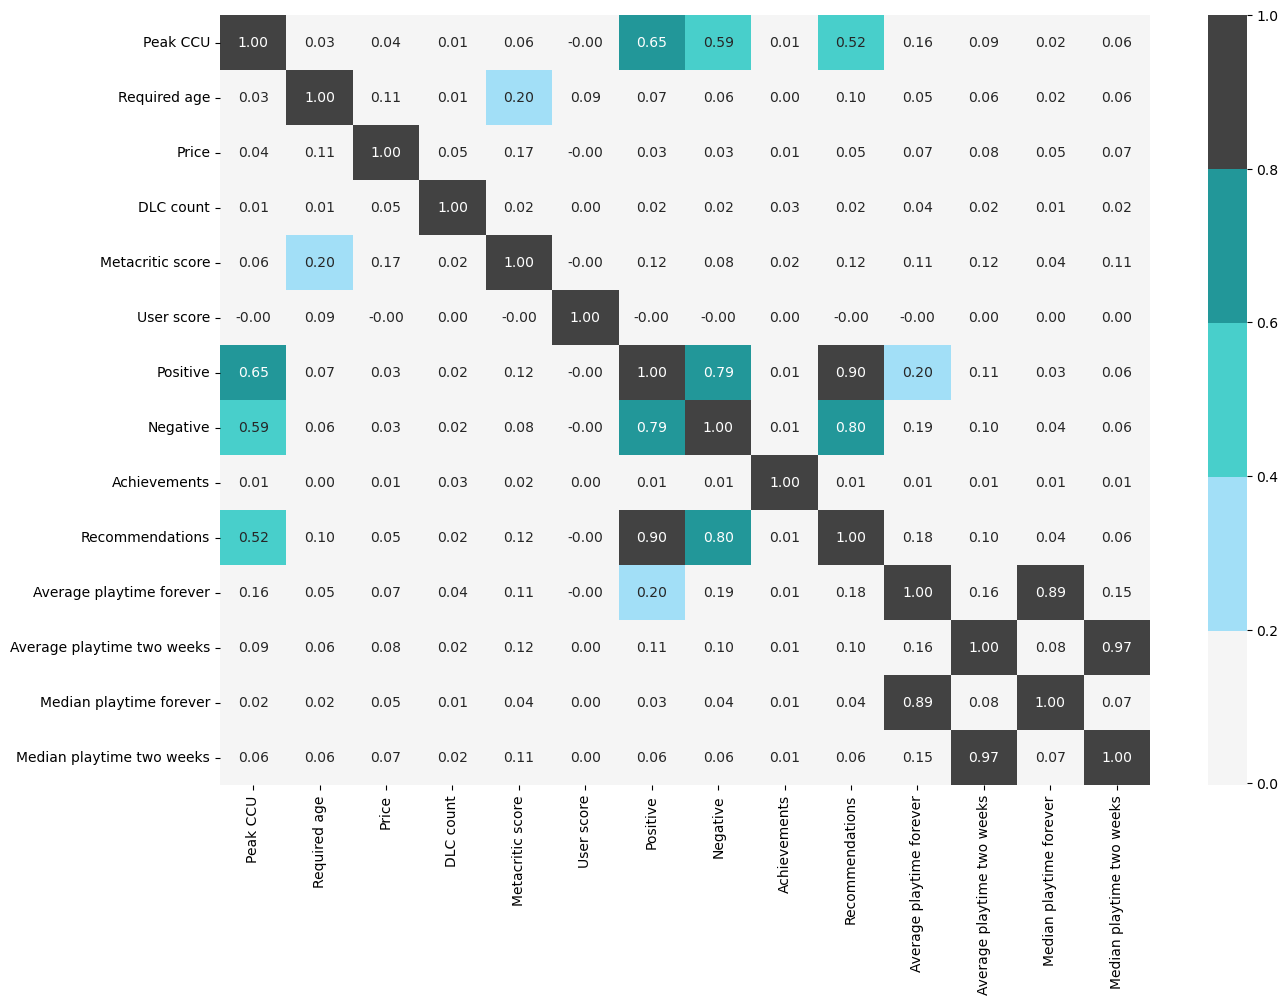

In [23]:
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True, cmap = cmap3, fmt = '.2f')
plt.show()

### Operating System

In [24]:
series = games[['Windows', 'Linux', 'Mac']].sum()

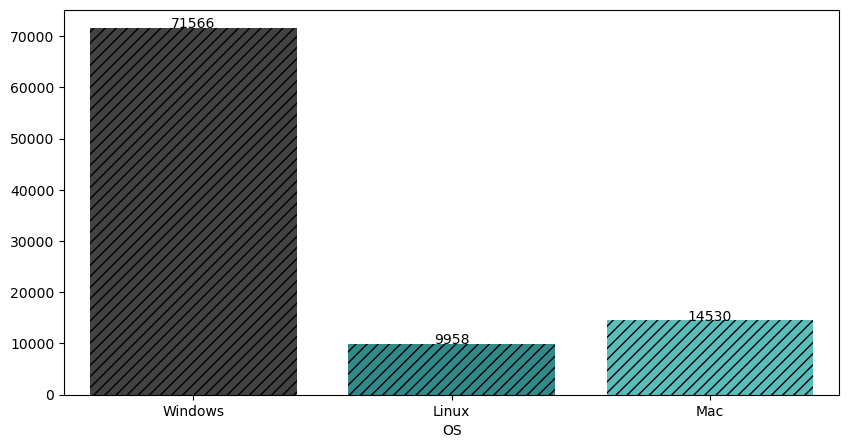

In [25]:
plt.figure(figsize = (10, 5))
sns.barplot(x = series.index, y = series.values, palette = palette3, hatch = '///')

for i in range(series.shape[0]):
    plt.text(i, series.values[i], series.values[i], ha = 'center')

plt.xlabel('OS')
plt.show()

### Release date

In [26]:
series = games['Release date'].dt.year.value_counts().sort_index(ascending = True)

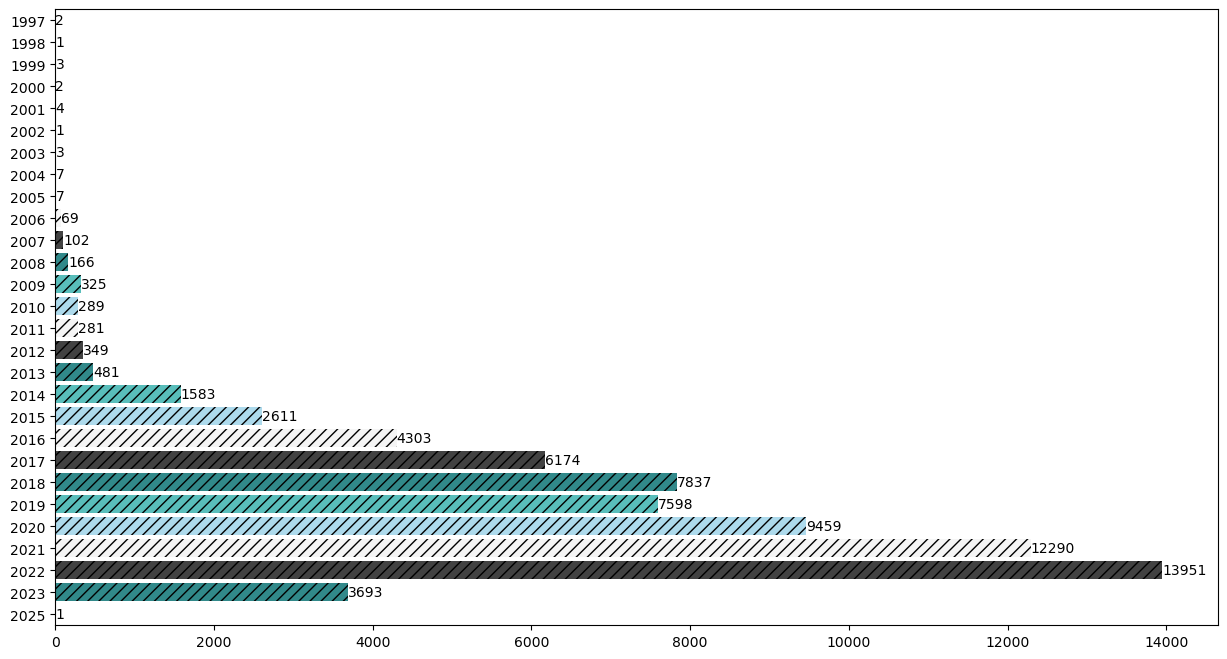

In [27]:
plt.figure(figsize = (15, 8))
sns.barplot(x = series.values, y = series.index, palette = palette3, hatch = '///', orient = 'h')

for i in range(series.shape[0]):
    plt.text(series.values[i], i, series.values[i], va='center')

plt.show()

In [28]:
series = games['Release date'].dt.month.value_counts().sort_index(ascending = True)

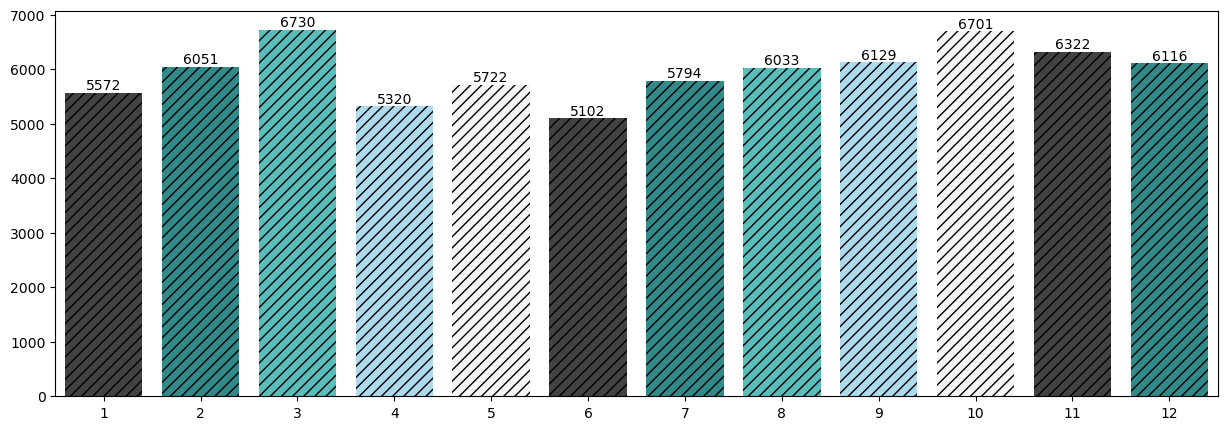

In [29]:
plt.figure(figsize = (15, 5))
sns.barplot(x = series.index, y = series.values, palette = palette3, hatch = '///')

for i in range(series.shape[0]):
    plt.text(i, series.values[i], series.values[i], ha = 'center', va = 'bottom')

plt.show()

### Price

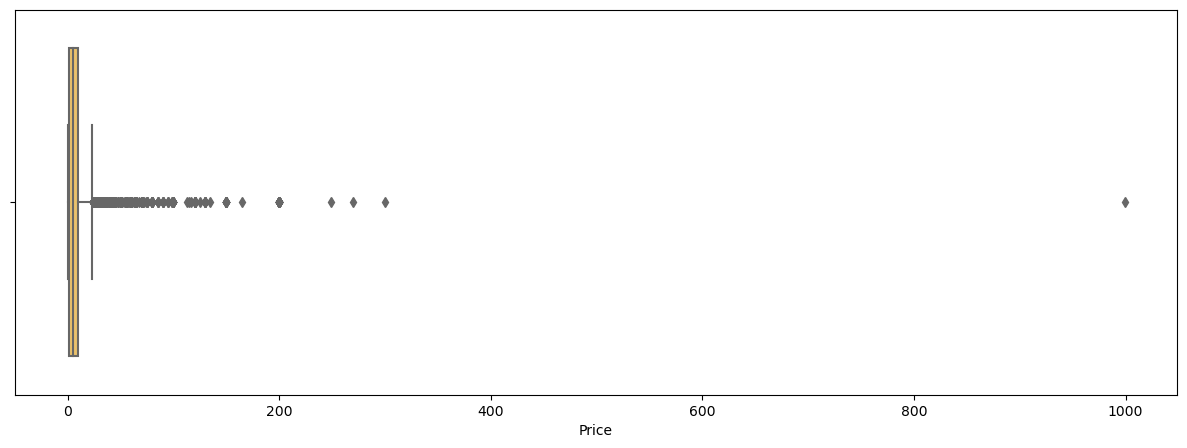

In [30]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = games['Price'], color = colors2[2])
plt.show()

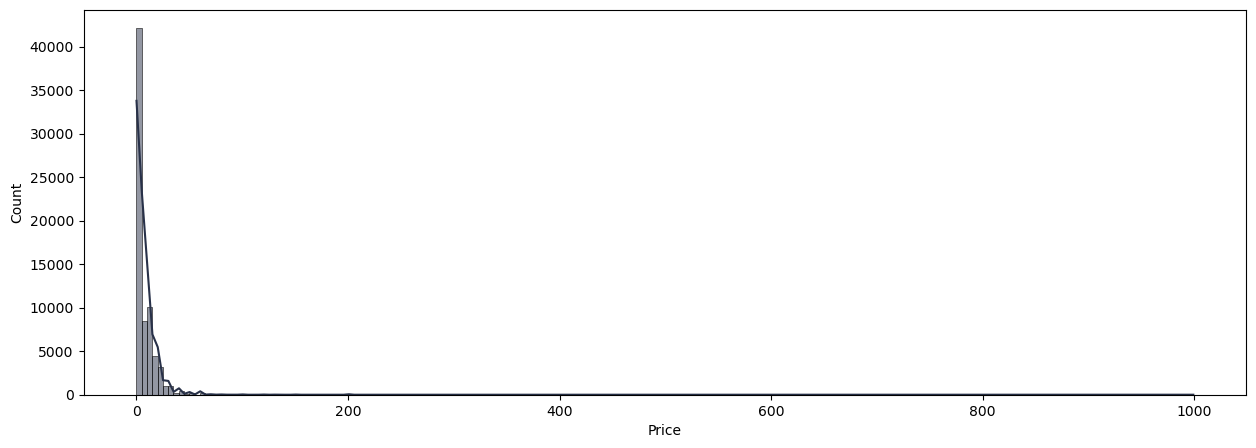

In [31]:
plt.figure(figsize = (15, 5))

sns.histplot(games['Price'], kde = True, color = colors[0], bins = 200)

plt.show()

In [32]:
# Number of outliers in 'Price'
count_outliers(games, 'Price')

3343

### Peak CCU

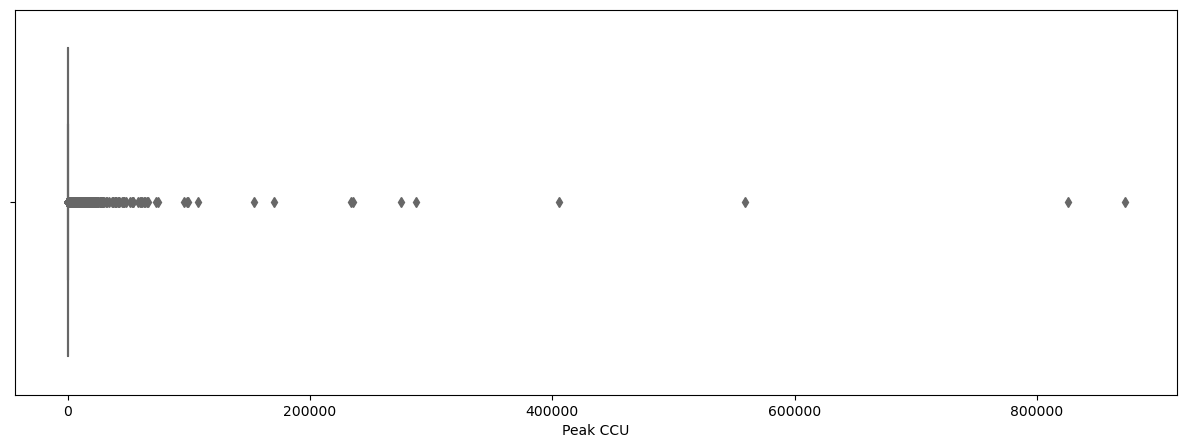

In [33]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = games['Peak CCU'], color = colors2[2])
plt.show()

In [34]:
# Number of outliers in 'Peak CCU'
count_outliers(games, 'Peak CCU')

11034

### Required Age

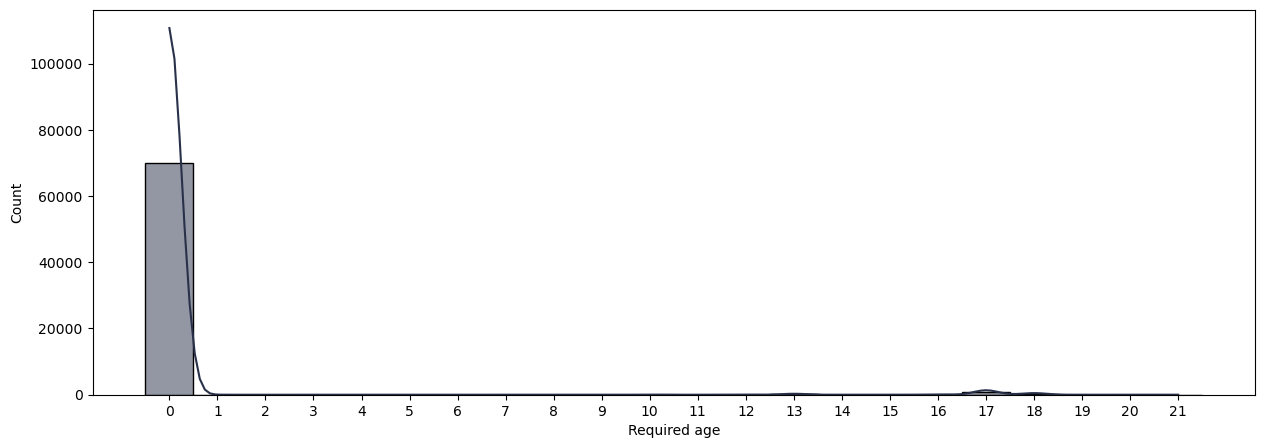

In [35]:
plt.figure(figsize = (15, 5))
sns.histplot(games['Required age'], kde = True, color = colors[0], discrete=True)
plt.xticks(np.arange(0, max(games['Required age']) + 1, 1))
plt.show()

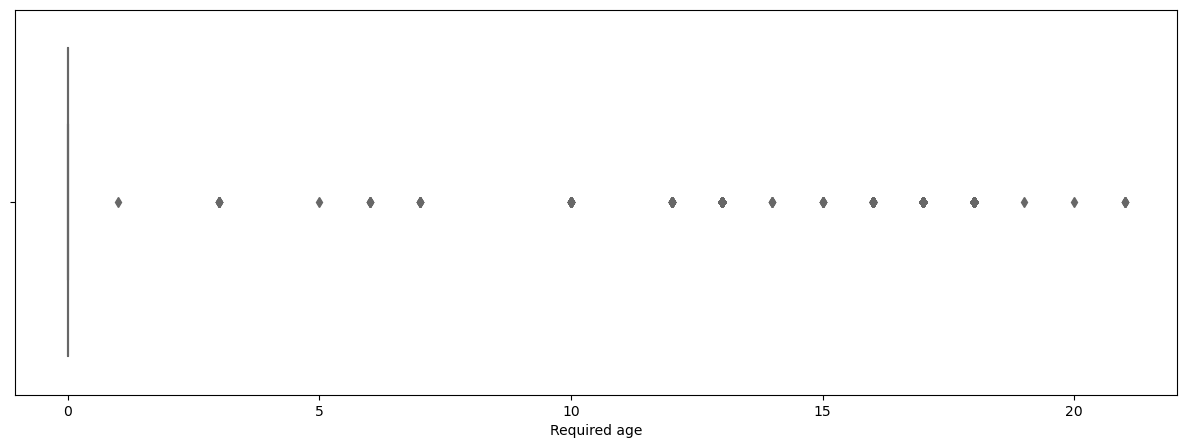

In [36]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = games['Required age'], color = colors2[2])
plt.show()

In [37]:
count_outliers(games, 'Required age')

1512

### DLC Count

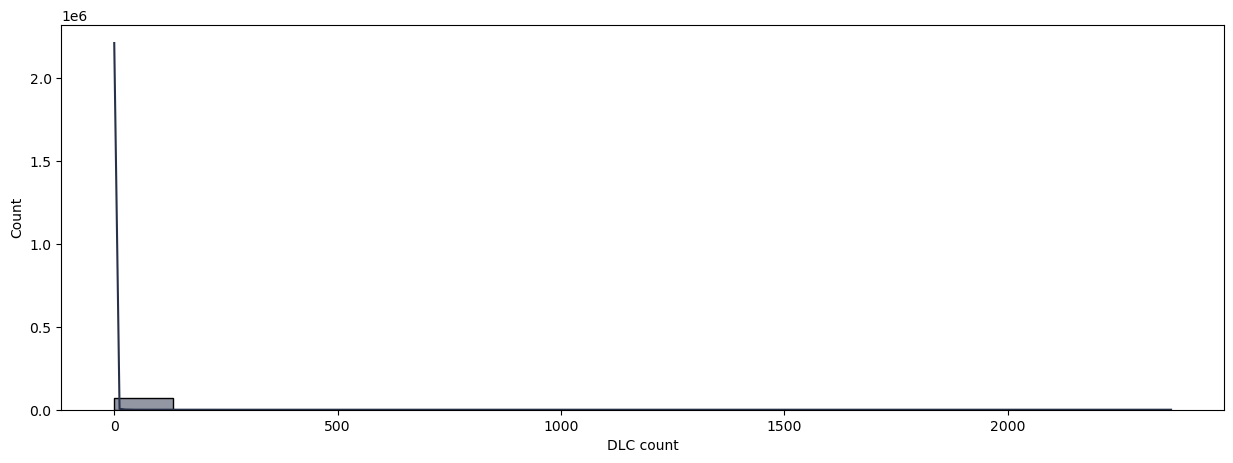

In [38]:
plt.figure(figsize = (15, 5))
sns.histplot(games['DLC count'], kde = True, color = colors[0])
plt.show()

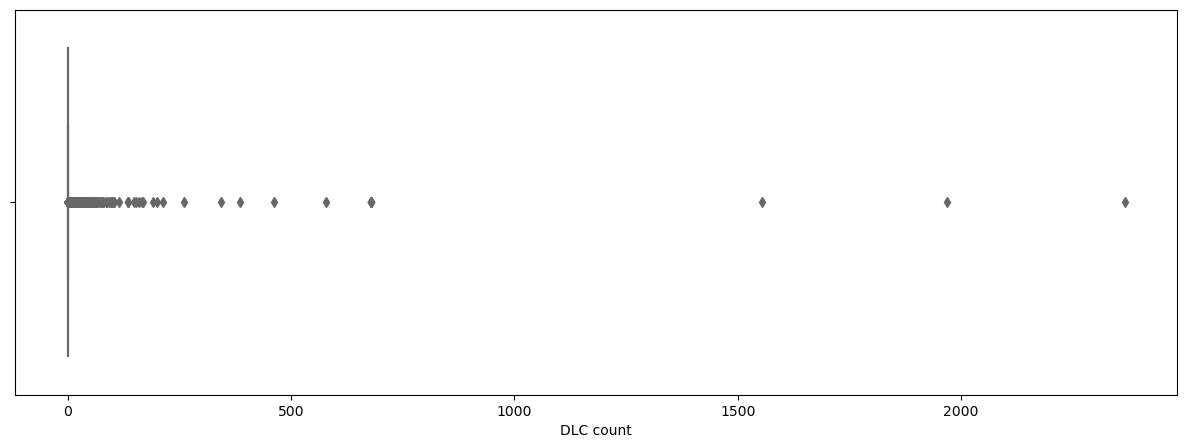

In [39]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = games['DLC count'], color = colors2[2])
plt.show()

In [40]:
count_outliers(games, 'DLC count')

10829

### Metacritic Score

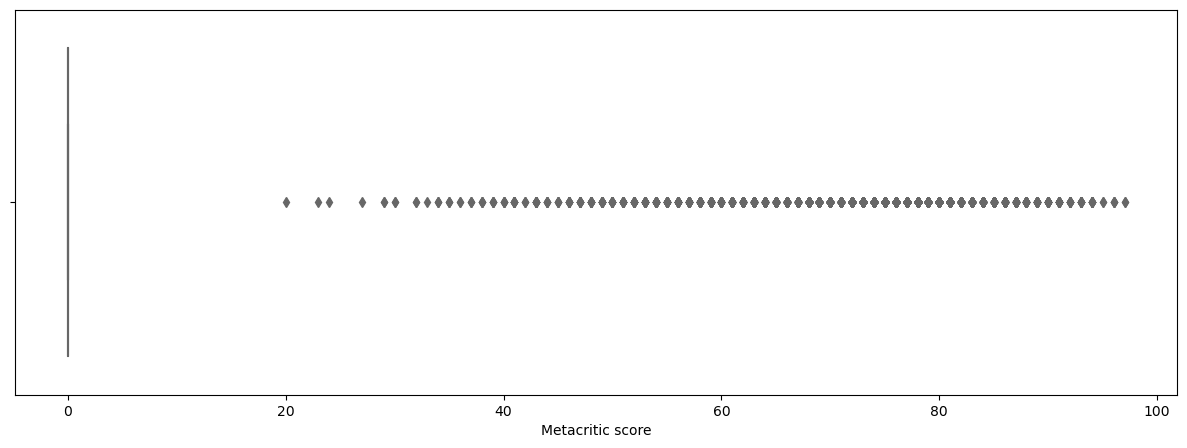

In [41]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = games['Metacritic score'], color = colors2[2])
plt.show()

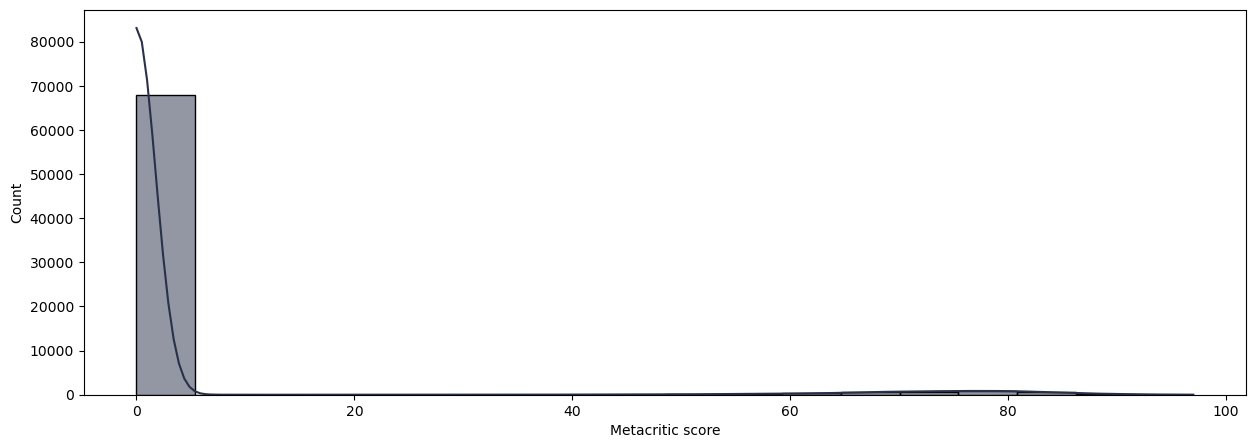

In [42]:
plt.figure(figsize = (15, 5))
sns.histplot(games['Metacritic score'], kde = True, color = colors[0])
plt.show()

In [43]:
count_outliers(games, 'Metacritic score')

3763

### User score

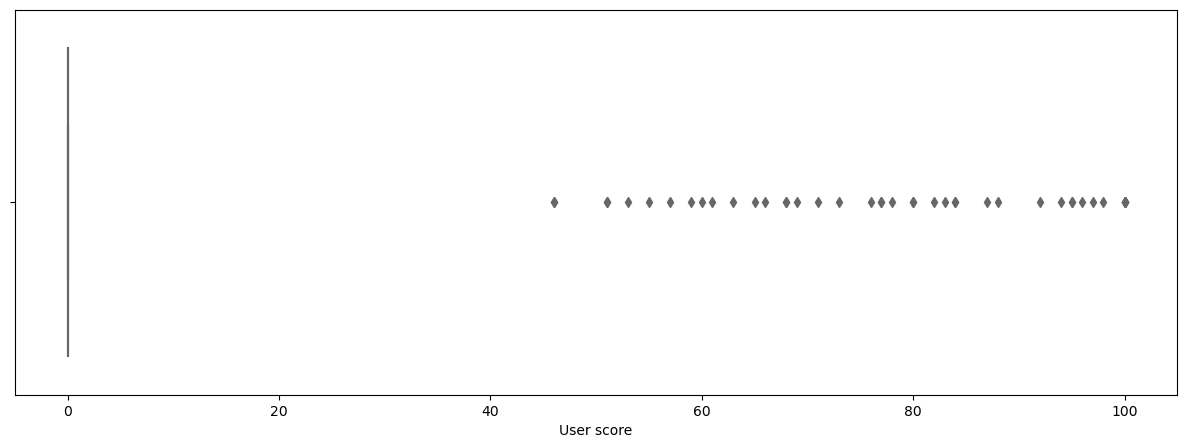

In [44]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = games['User score'], color= colors2[2])
plt.show()

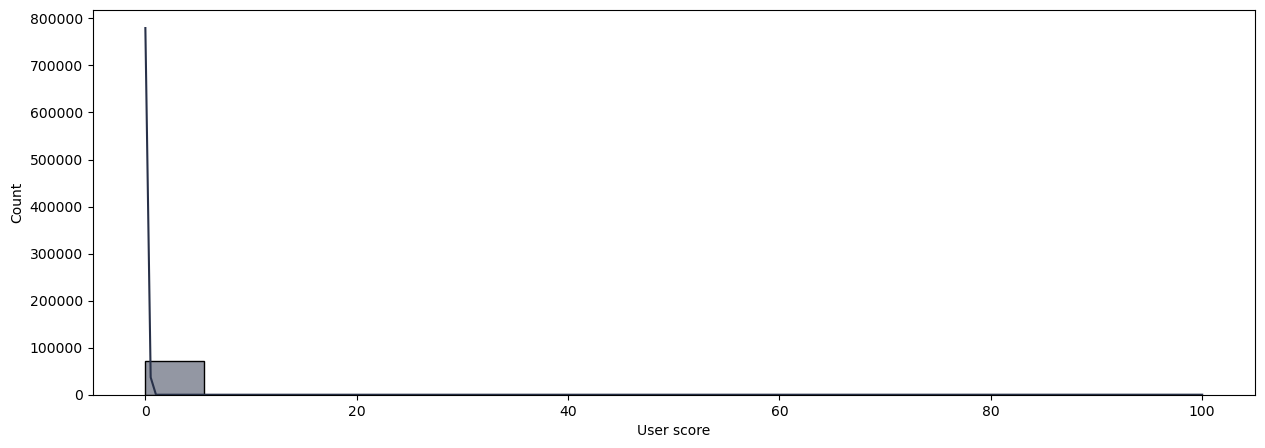

In [45]:
plt.figure(figsize = (15 ,5))
sns.histplot(games['User score'], kde = True, color = colors[0])
plt.show()

In [46]:
count_outliers(games, 'User score')

42

### Positive

<AxesSubplot:xlabel='Positive'>

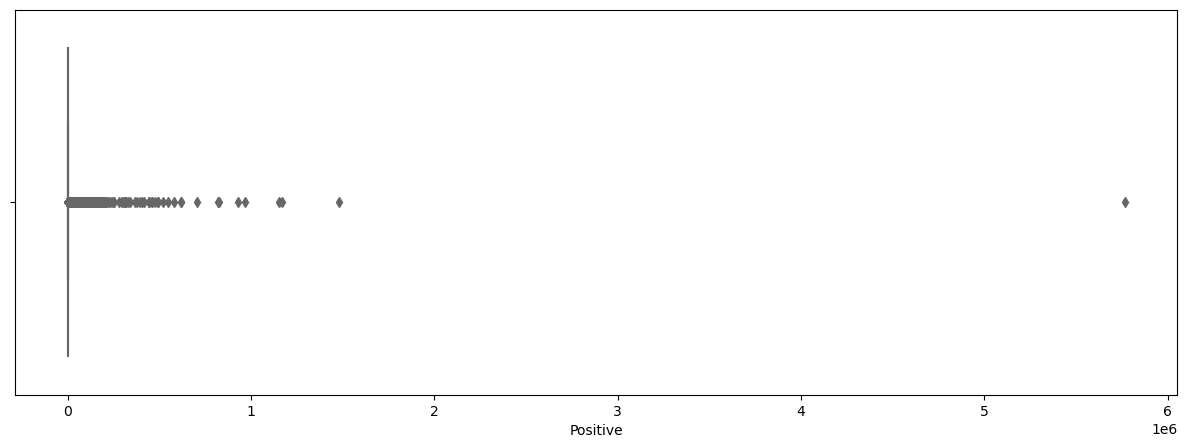

In [47]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = games['Positive'], color = colors2[2])

In [48]:
count_outliers(games, 'Positive')

12165

### Negative

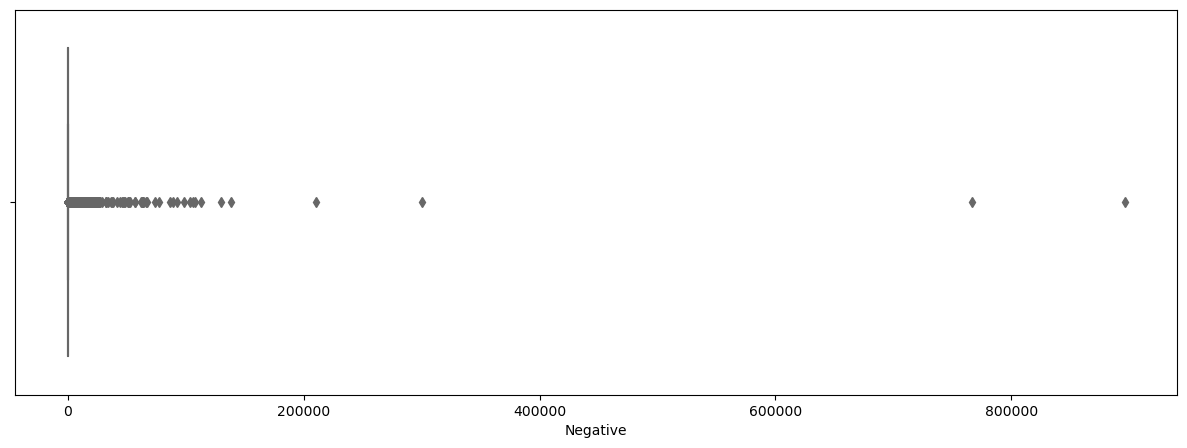

In [49]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = games['Negative'], color = colors2[2])
plt.show()

In [50]:
count_outliers(games, 'Negative')

11414

### Achievements

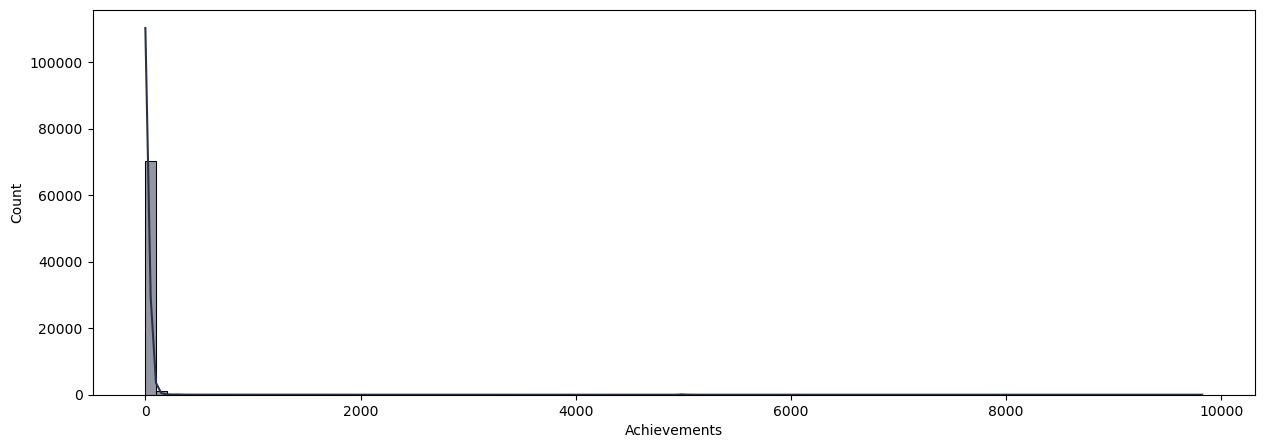

In [51]:
plt.figure(figsize = (15, 5))
sns.histplot(games['Achievements'], kde = True, color = colors[0], bins = 100)
plt.show()

In [52]:
count_outliers(games, 'Achievements')

4958

### Recommendations

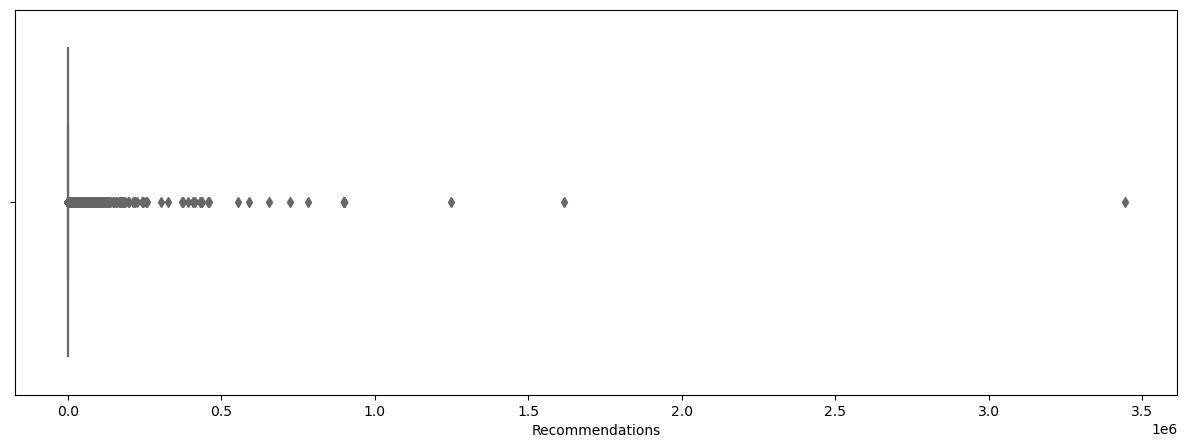

In [53]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = games['Recommendations'], color = colors2[2])
plt.show()

In [54]:
count_outliers(games, 'Recommendations')

12793

### Average playtime forever

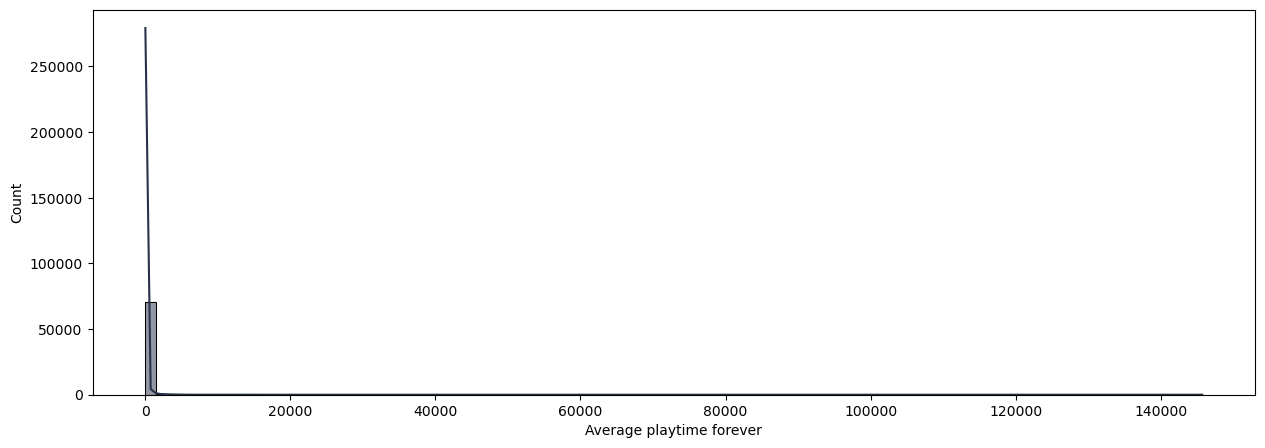

In [55]:
plt.figure(figsize = (15, 5))
sns.histplot(games['Average playtime forever'], bins = 100, kde = True, color = colors[0])
plt.show()

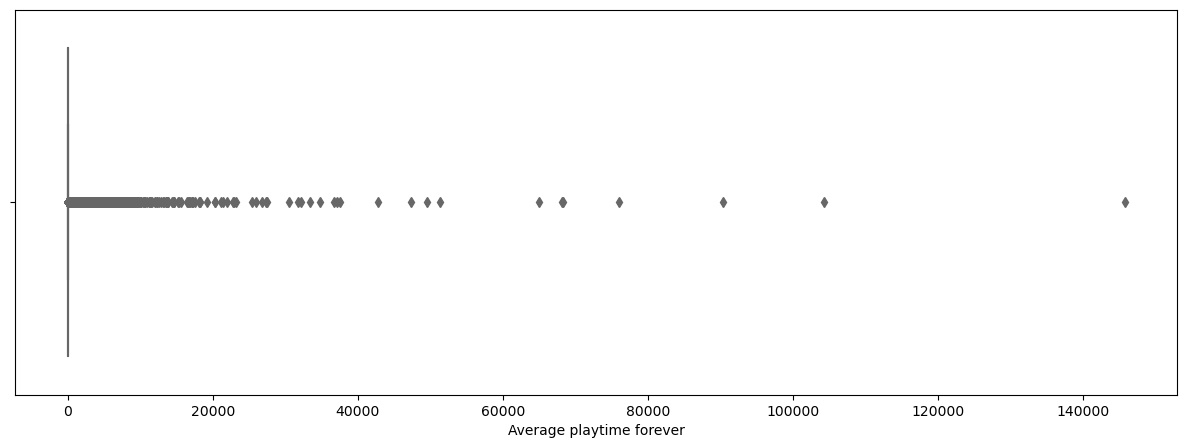

In [56]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = games['Average playtime forever'], color = colors2[2])
plt.show()

In [57]:
count_outliers(games, 'Average playtime forever')

14309

### Average playtime two weeks

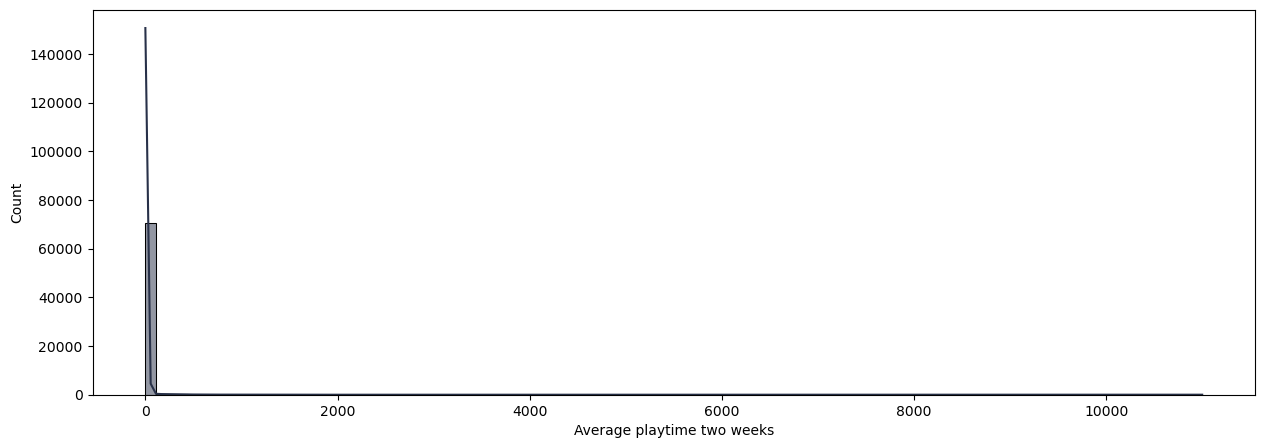

In [58]:
plt.figure(figsize = (15, 5))
sns.histplot(games['Average playtime two weeks'], bins = 100, kde = True, color = colors[0])
plt.show()

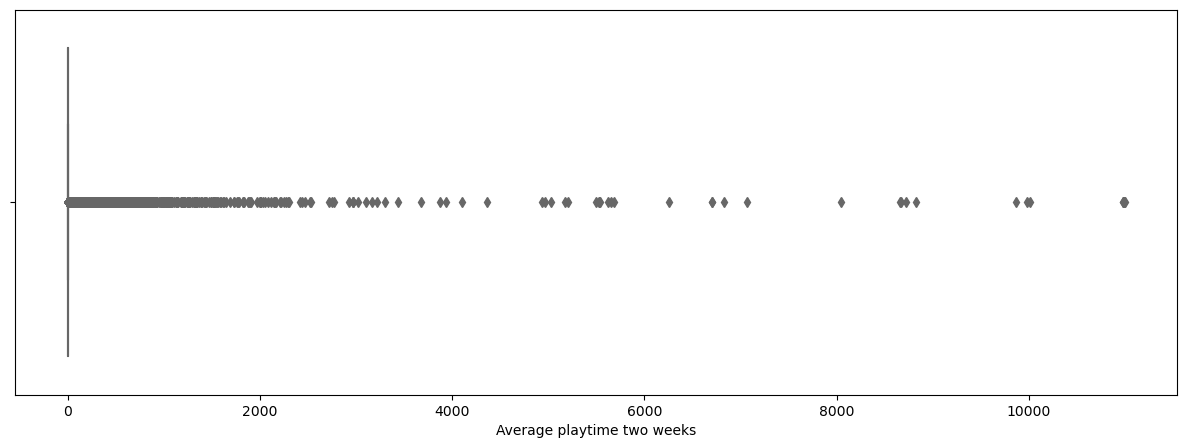

In [59]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = games['Average playtime two weeks'], color = colors2[2])
plt.show()

In [60]:
count_outliers(games, 'Average playtime two weeks')

1852

### Median playtime forever

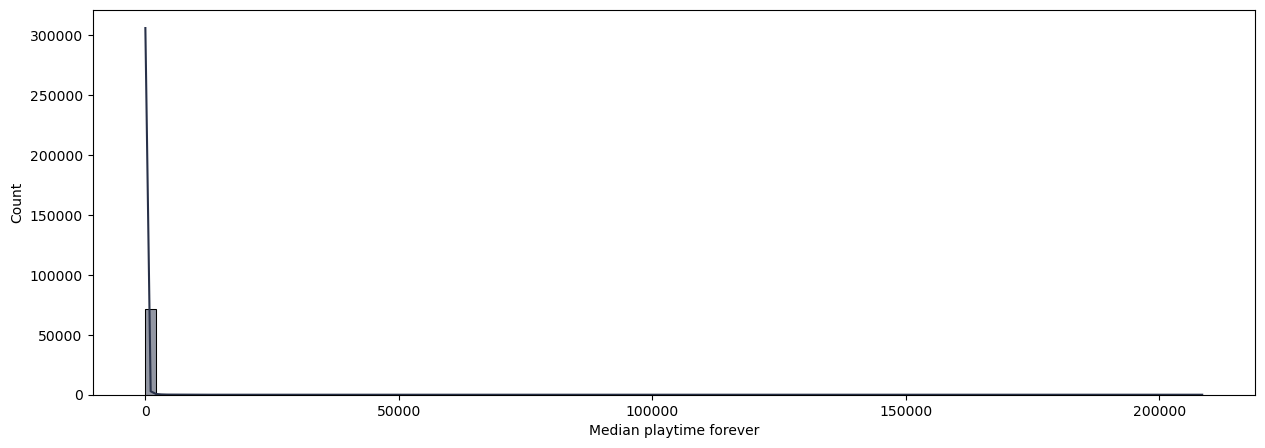

In [61]:
plt.figure(figsize = (15, 5))
sns.histplot(games['Median playtime forever'], bins = 100, kde = True, color = colors[0])
plt.show()

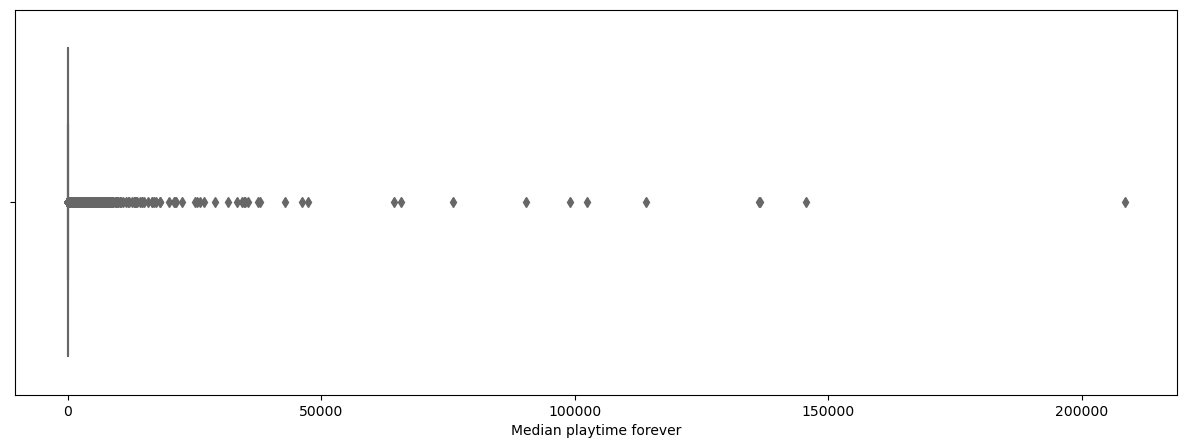

In [62]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = games['Median playtime forever'], color = colors2[2])
plt.show()

In [63]:
count_outliers(games, 'Median playtime forever')

14309

### Median playtime two weeks

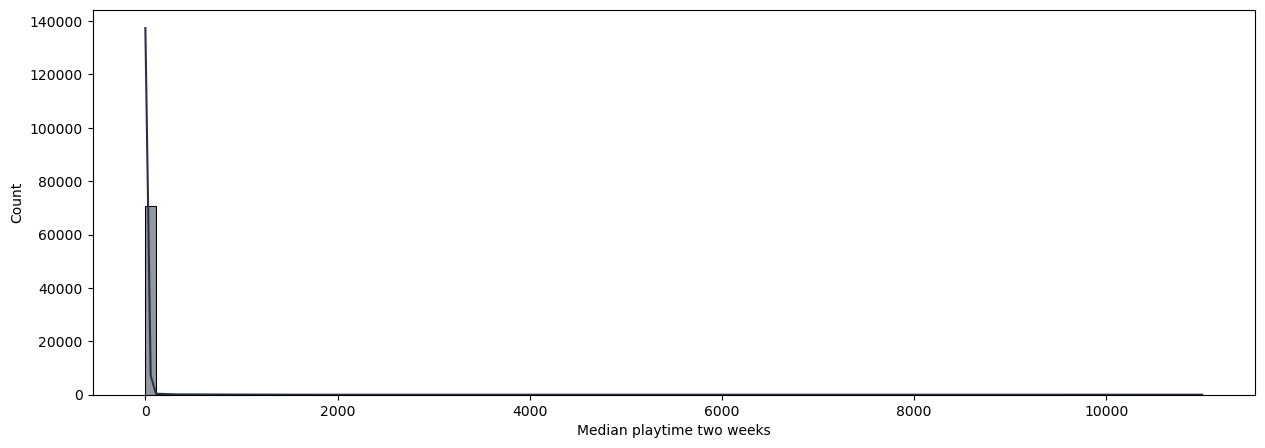

In [64]:
plt.figure(figsize = (15, 5))
sns.histplot(games['Median playtime two weeks'], bins = 100, kde = True, color = colors[0])
plt.show()

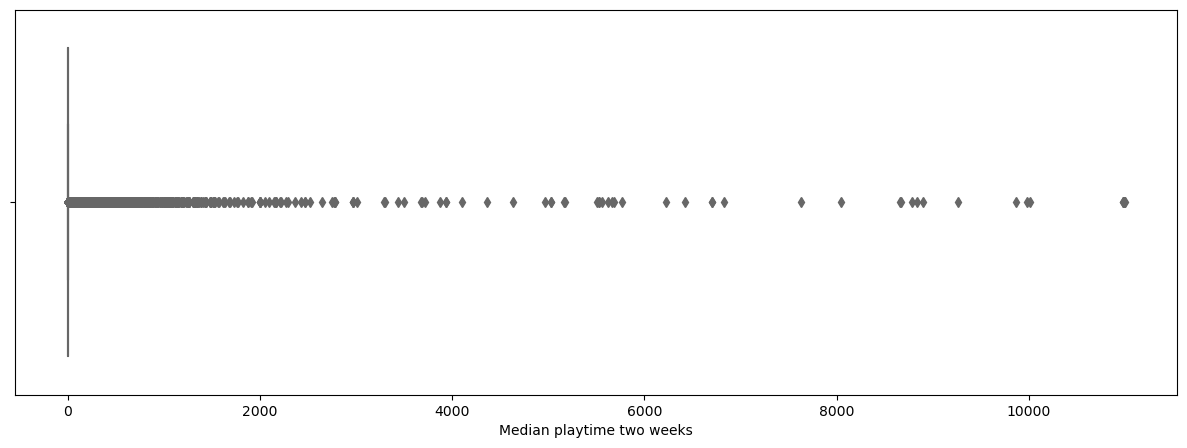

In [65]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = games['Median playtime two weeks'], color = colors2[2])
plt.show()

In [66]:
count_outliers(games, 'Median playtime two weeks')

1852

### Estimated Owners

In [94]:
series = games['Estimated owners'].value_counts(ascending = False)

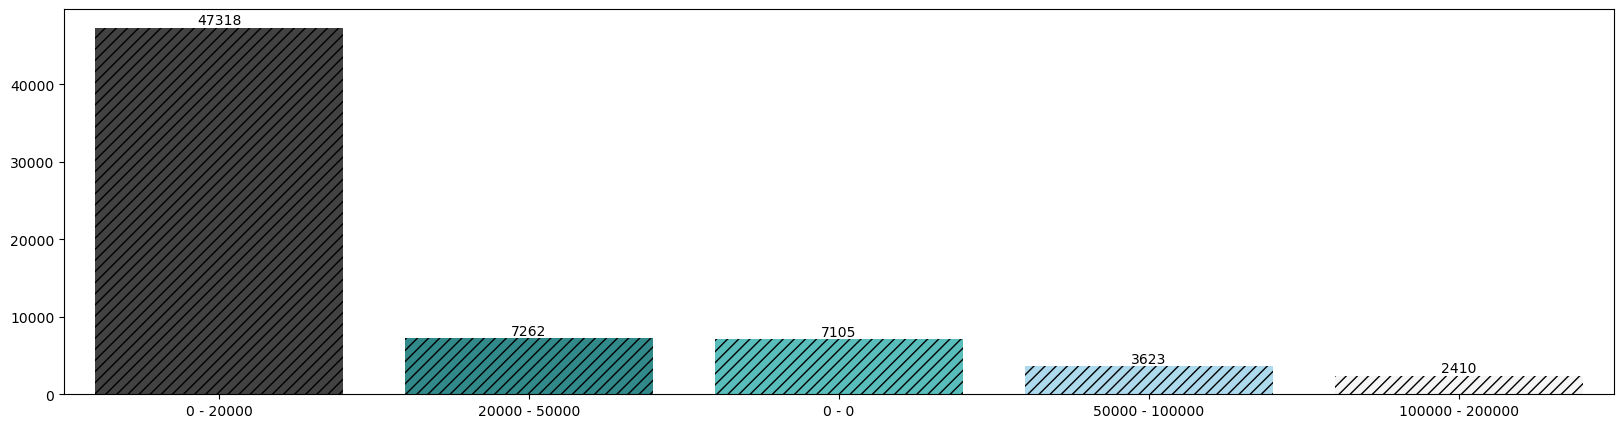

In [85]:
plt.figure(figsize = (20, 5))
sns.barplot(x = series[:5].index, y = series[:5].values, palette = palette3, hatch = '///')

for i in range(series[:5].shape[0]):
    plt.text(i, series.values[i], series.values[i], ha = 'center', va = 'bottom')

plt.show()

In [135]:
df = pd.DataFrame(series.values, columns=['count'], index= series.index)

In [137]:
df['h'] = df['count'] / df['count'].sum()

In [138]:
df['H'] = df['h'].cumsum()

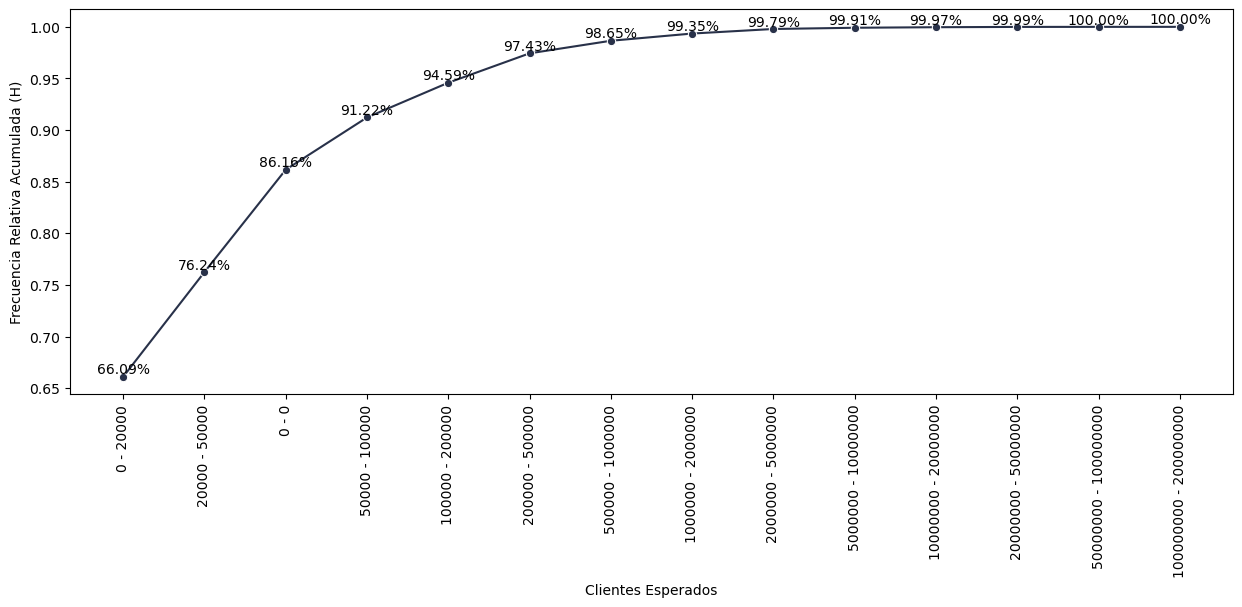

In [140]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = df.index, y = df['H'], color = colors[0], marker = "o")

for i in range(df.shape[0]):
    plt.text(df.index[i], df['H'].iloc[i], f'{df["H"].iloc[i] * 100:.2f}%', ha = 'center', va = 'bottom')

plt.ylabel('Frecuencia Relativa Acumulada (H)')
plt.xlabel('Clientes Esperados')
plt.xticks(rotation = 90)
plt.show()

## Pre-processing

In [141]:
outliers = ['Price']

In [142]:
replace_outliers(games, outliers)

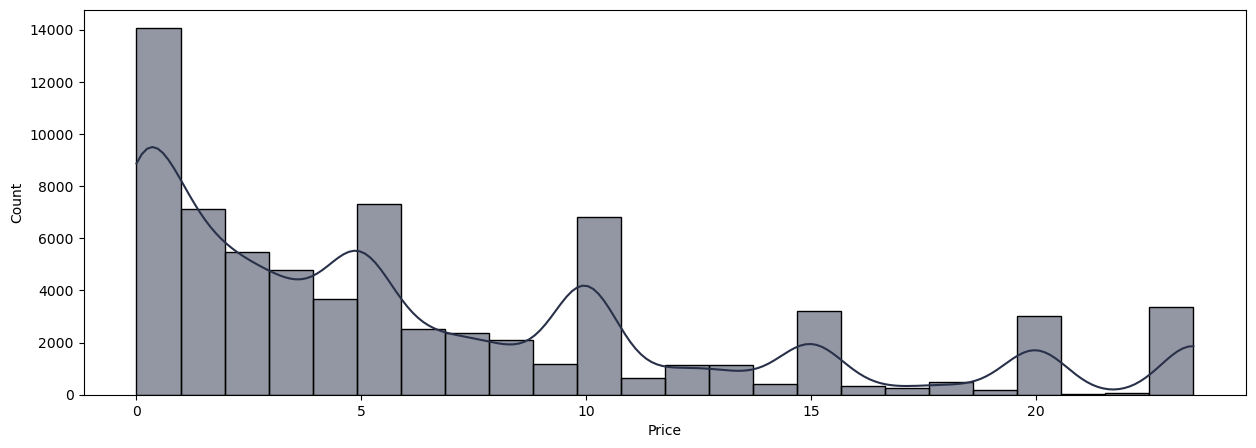

In [143]:
plt.figure(figsize = (15, 5))
sns.histplot(games['Price'], bins = 24, kde = True, color = colors[0])
plt.show()

In [144]:
games['+15'] = games['Required age'].apply(lambda x: 1 if x >= 15 else 0)

In [145]:
first_group = [
    '20000 - 50000', '50000 - 100000', '100000 - 200000',
    '200000 - 500000', '500000 - 1000000', '1000000 - 2000000',
    '2000000 - 5000000', '5000000 - 10000000', '10000000 - 20000000',
    '20000000 - 50000000', '50000000 - 100000000', '100000000 - 200000000'
]

In [146]:
games['Estimated owners'].replace(first_group, '> 20000', inplace = True)

In [147]:
test = games[games['Estimated owners'] == '0 - 20000']

In [148]:
test['Estimated owners'][:test.shape[0]//2].replace('0 - 20000', '0 - 10000', inplace = True)

In [149]:
test['Estimated owners'][test.shape[0]//2:].replace('0 - 20000', '10000 - 20000', inplace = True)

In [150]:
test['Estimated owners'].value_counts()

0 - 10000        23659
10000 - 20000    23659
Name: Estimated owners, dtype: int64

In [151]:
games = pd.concat((games[games['Estimated owners'] != '0 - 20000'], test), axis = 0)

In [152]:
series = games['Estimated owners'].value_counts()

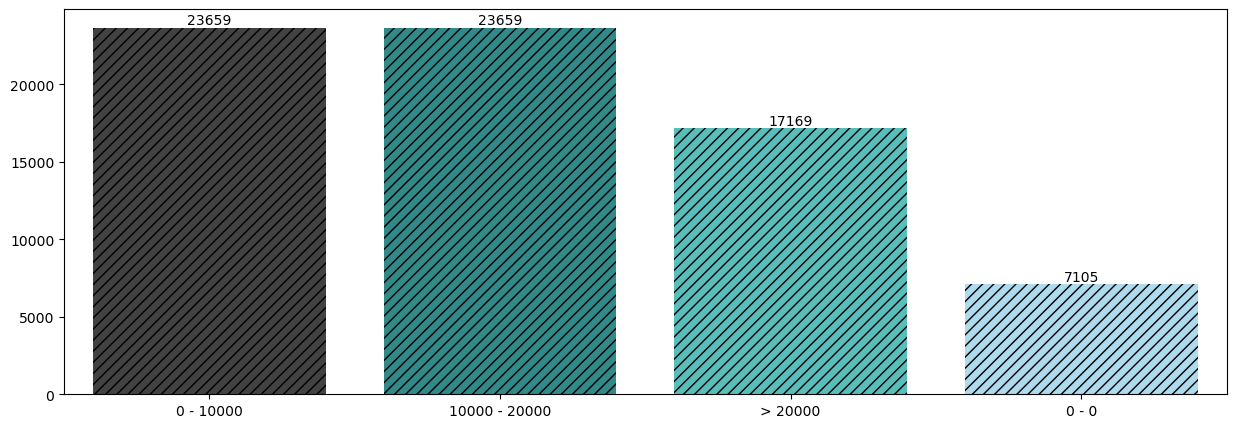

In [153]:
plt.figure(figsize = (15, 5))
sns.barplot(x = series.index, y = series.values, palette = palette3, hatch = '///')

for i in range(series.shape[0]):
    plt.text(i, series.values[i], series.values[i], ha = 'center', va = 'bottom')
plt.show()

In [154]:
games.drop(columns = ['Required age'], inplace = True)

In [155]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71592 entries, 5 to 71715
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Release date                71592 non-null  datetime64[ns]
 1   Estimated owners            71592 non-null  object        
 2   Peak CCU                    71592 non-null  int64         
 3   Price                       71592 non-null  float64       
 4   DLC count                   71592 non-null  int64         
 5   Supported languages         71592 non-null  object        
 6   Windows                     71592 non-null  bool          
 7   Mac                         71592 non-null  bool          
 8   Linux                       71592 non-null  bool          
 9   Metacritic score            71592 non-null  int64         
 10  User score                  71592 non-null  int64         
 11  Positive                    71592 non-null  int64     

# Save Dataset

In [156]:
games.to_csv('../data/games_clean.csv', index = False)

# Conclusions

- Visualization has been carried out to understand the distribution of numerical data, where normalization has been applied to all features except for the **Price** feature. Additionally, different types of normalization have been considered based on the distribution and the number of outliers present in each variable.